In [1]:
import pandas as pd
import numpy as np
import h5py

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn.metrics import v_measure_score

In [2]:
test_targets = None
train_targets = None

with h5py.File("../data/images.h5", "r") as fo:
    train_targets = np.array(fo["train_targets"])
    test_targets = np.array(fo["test_targets"])

In [3]:
train_latent = np.load("../drawing/latent/train_latent.npy")
test_latent = np.load("../drawing/latent/test_latent.npy")

In [4]:
n_train = train_latent.shape[0]
n_test = test_latent.shape[0]

train_targets = train_targets[:n_train]
test_targets = test_targets[:n_test]

In [14]:
data = pd.DataFrame()
data["train_latent"] = train_latent
data["train_targets"] = train_targets

Exception: Data must be 1-dimensional

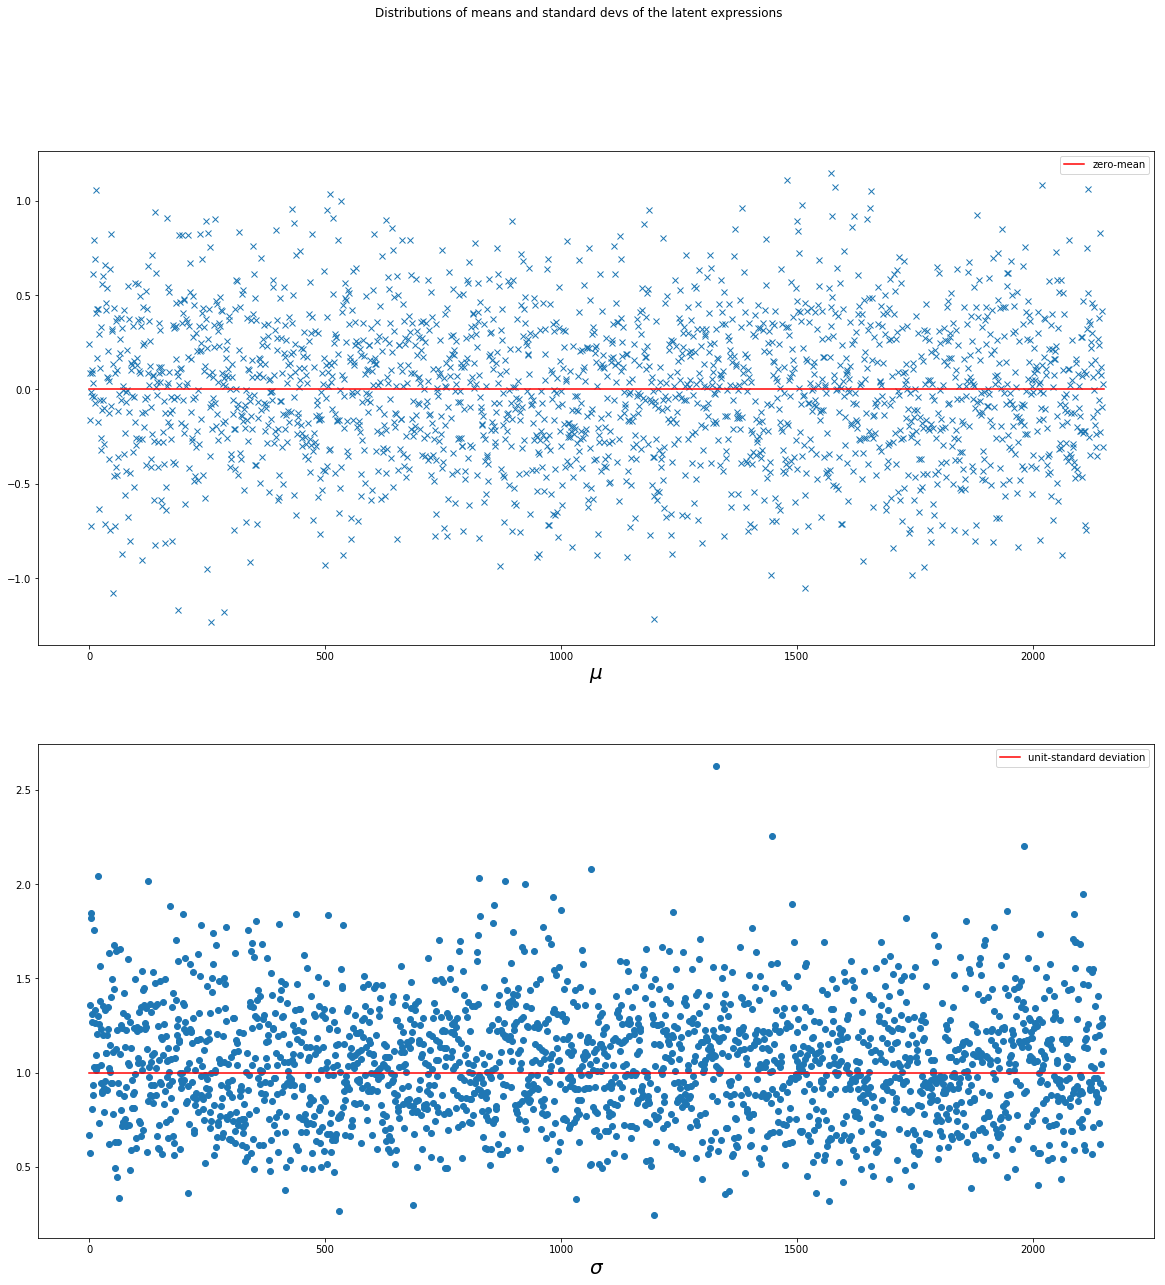

In [5]:
means = np.average(train_latent, axis = 1)
stds = np.std(train_latent, axis = 1)

fig, axs = plt.subplots(nrows = 2, figsize = (20, 20))
fig.suptitle("Distributions of means and standard devs of the latent expressions")

axs[0].plot(means, "x")
axs[0].plot([0, 2150], [0, 0], "r", label="zero-mean")

axs[0].set_xlabel(r"$\mu$", size = 20)
axs[0].legend()

axs[1].plot(stds, "o")
axs[1].plot([0, 2150], [1, 1], "r", label="unit-standard deviation")

axs[1].set_xlabel(r"$\sigma$", size = 20)
axs[1].legend()


In [6]:
n_zero = sum(train_targets == 0)
n_one = sum(train_targets == 1)
n_two = sum(train_targets == 2)

print("Distribution of classes")
print("% in 0 class: ", 100*(n_zero/n_train))
print("% in 1 class: ", 100*(n_one/n_train))
print("% in 2 class: ", 100*(n_two/n_train))

Distribution of classes
% in 0 class:  25.441860465116278
% in 1 class:  12.651162790697674
% in 2 class:  61.906976744186046


In [11]:
print(train_latent.shape)

(2150, 8)


In [12]:
clustering = AgglomerativeClustering(
                n_clusters=3,
                affinity="cosine",
                linkage="average"
                )
predicted = clustering.fit_predict(train_latent)

In [13]:
n_zero = sum(predicted == 0)
n_one = sum(predicted == 1)
n_two = sum(predicted == 2)

print("Distribution of classes: Predicted")
print("% in 0 class: ", 100*(n_zero/n_train))
print("% in 1 class: ", 100*(n_one/n_train))
print("% in 2 class: ", 100*(n_two/n_train))

print("\n")
print("Score [0.0 - 1.0]: ", v_measure_score(train_targets, predicted))

Distribution of classes: Predicted
% in 0 class:  47.348837209302324
% in 1 class:  35.348837209302324
% in 2 class:  17.302325581395348


Score [0.0 - 1.0]:  0.001012652086626659
